# 1) EDA

## Importando Bibliotecas:


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings as wr

wr.filterwarnings('ignore')


## Carregamento e análise preliminar do dataset:

In [123]:
df = pd.read_csv('desafio_indicium_imdb.csv')

# verificando se dataset foi carregado corretamente
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [124]:
# Obtendo mais informações do dataset

print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.columns)

(999, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None


Index(['Unnamed: 0'

Removendo coluna "Unnamed:0" pois aparentemente é uma coluna que não traz nenhuma informação relevante:

In [125]:
df = df.drop('Unnamed: 0', axis=1)

In [126]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


## Obtendo estatísticas (média, desvio, quartis, etc) de colunas com variáveis numéricas:

In [127]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


## Verificando valores nulos:


In [128]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

É verificado que as colunas referentes a faixa etária, média das críticas e faturamento possuem lacunas. Aqui pode ser feita a escolha de remover apenas as colunas caso elas não sejam relevantes para o nosso objetivo, ou remover as linhas onde ocorrem as lacunas. Optei por remover as linhas, pois acredito que todas as colunas serão utilizadas:

In [129]:
df.dropna(inplace=True)

In [130]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 996
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   713 non-null    object 
 1   Released_Year  713 non-null    object 
 2   Certificate    713 non-null    object 
 3   Runtime        713 non-null    object 
 4   Genre          713 non-null    object 
 5   IMDB_Rating    713 non-null    float64
 6   Overview       713 non-null    object 
 7   Meta_score     713 non-null    float64
 8   Director       713 non-null    object 
 9   Star1          713 non-null    object 
 10  Star2          713 non-null    object 
 11  Star3          713 non-null    object 
 12  Star4          713 non-null    object 
 13  No_of_Votes    713 non-null    int64  
 14  Gross          713 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 89.1+ KB


Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Por último verificamos a existência de linhas duplicadas:


In [131]:
df.duplicated().sum()

0

## Análise Univariada:

Colunas Categóricas:

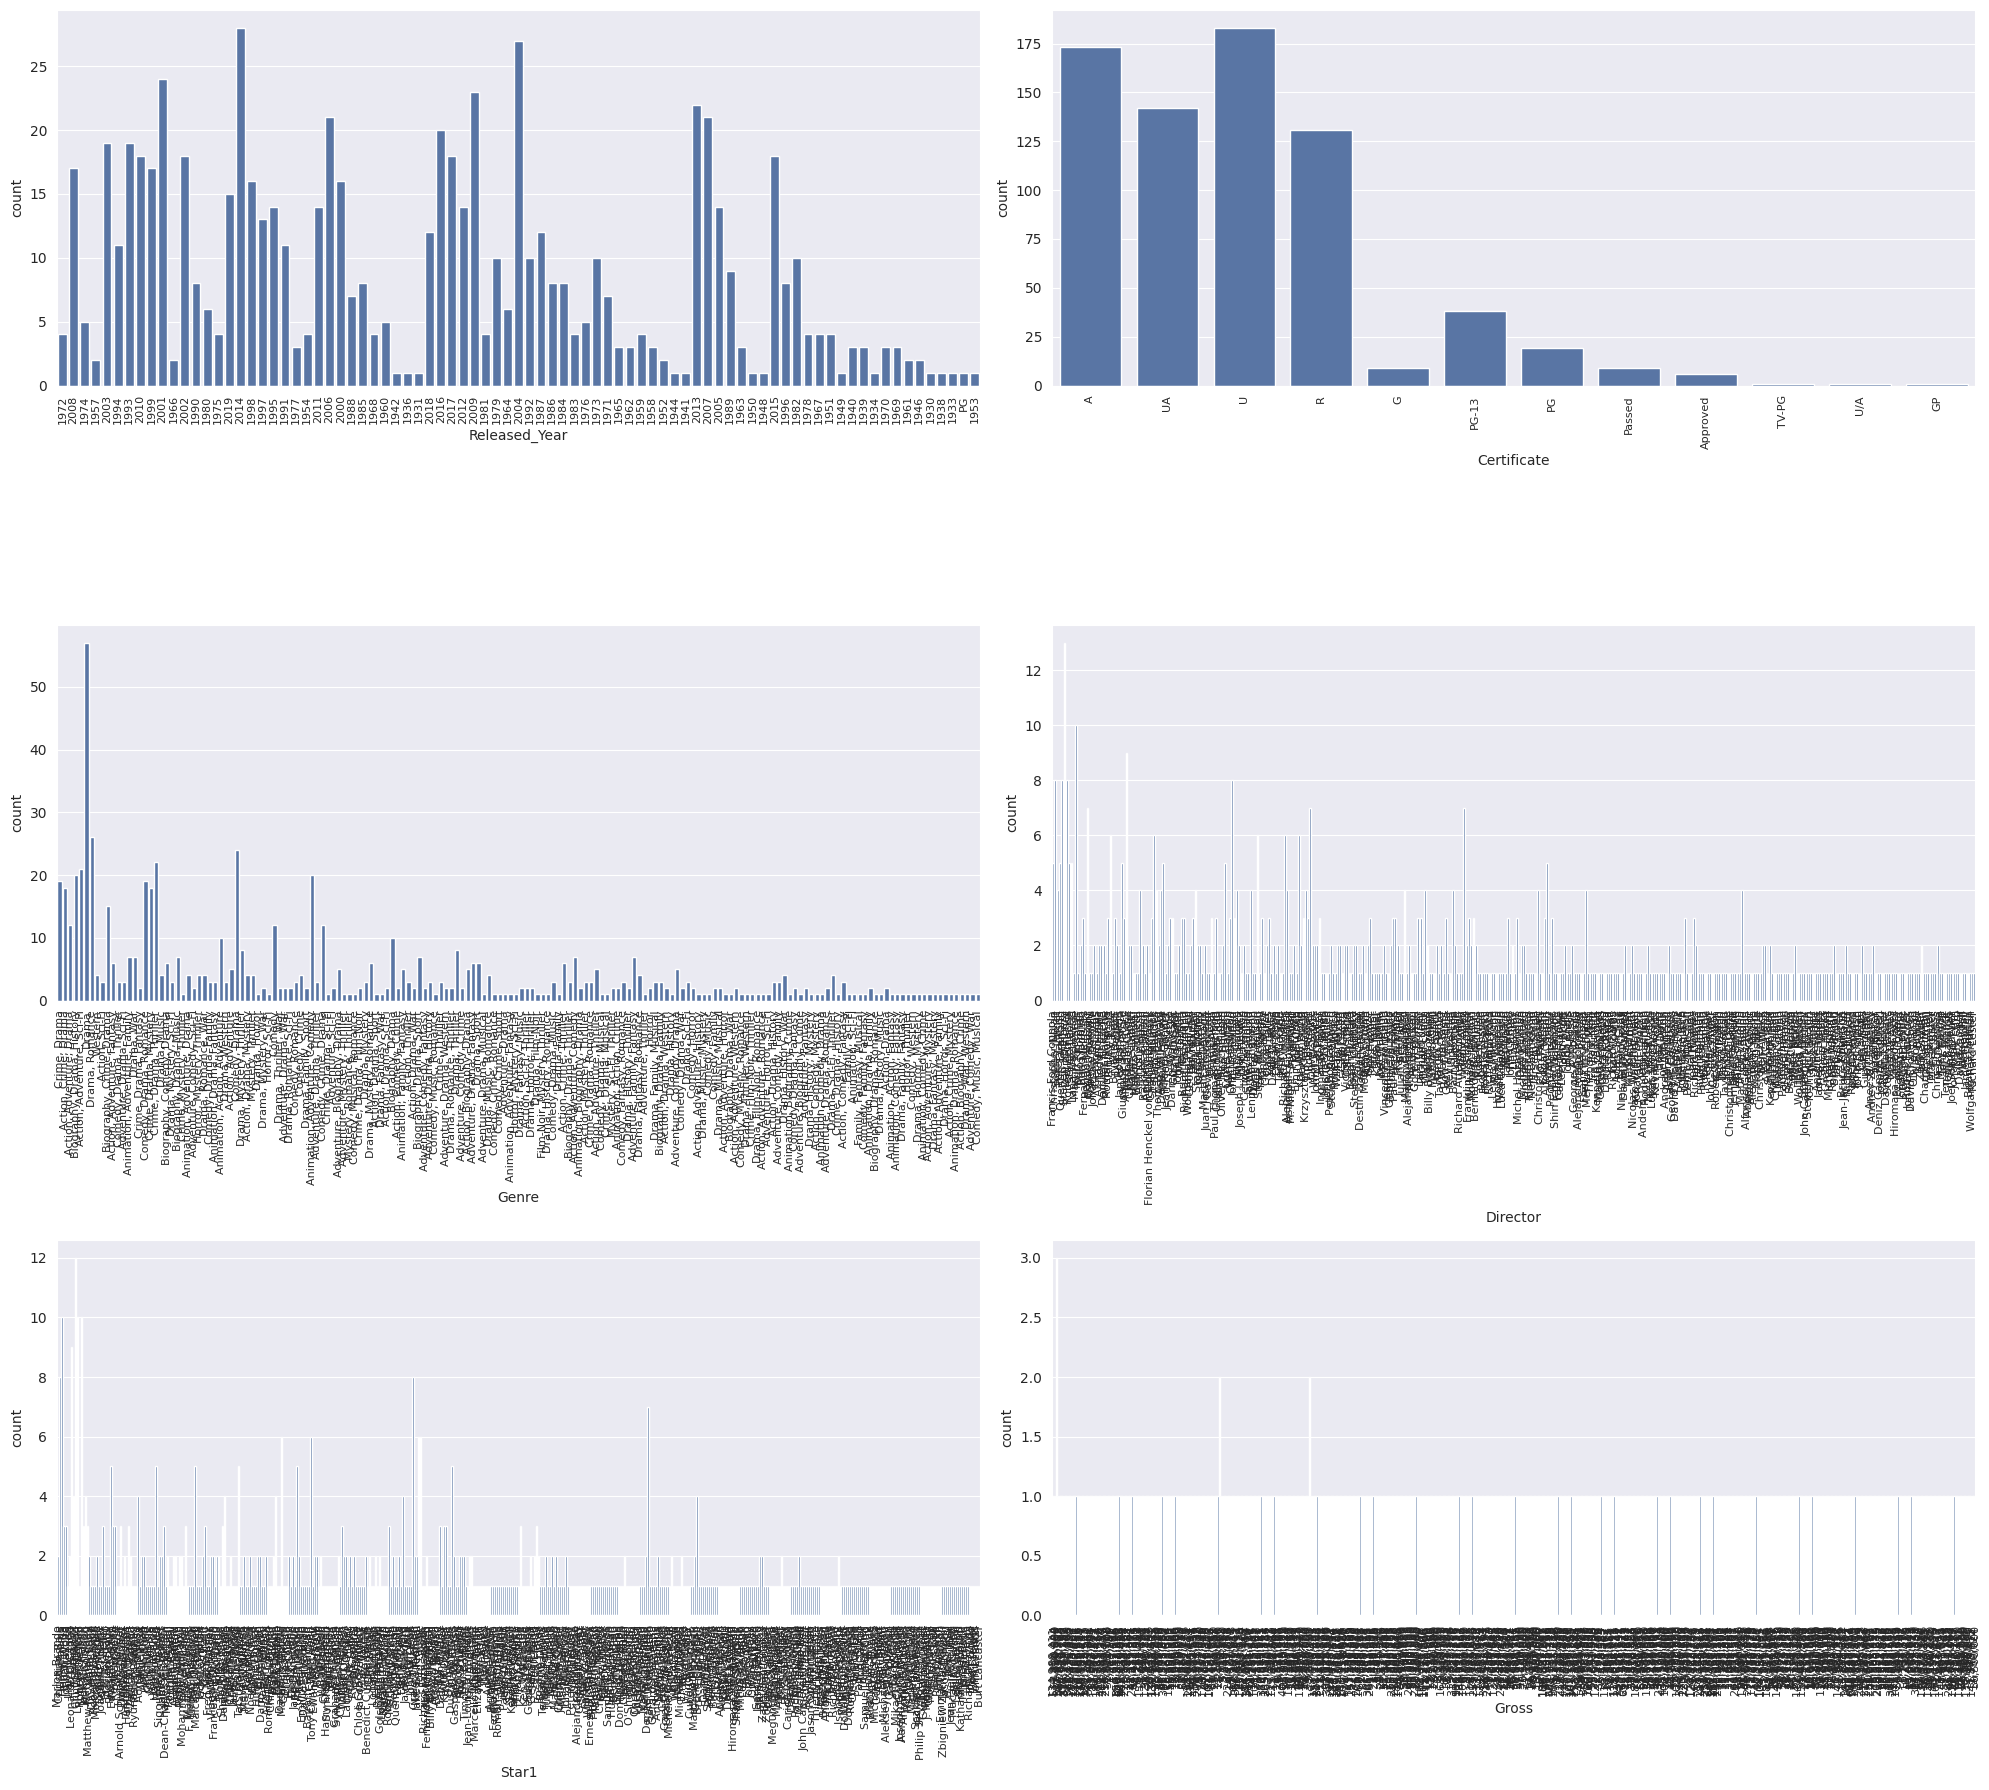

In [132]:


sns.set_style("darkgrid")


CategoricalColumns = ['Released_Year', 'Certificate', 'Genre', 'Director', 'Star1', 'Gross' ]


plt.figure(figsize=(20, len(CategoricalColumns) * 3))
for i in range(len(CategoricalColumns)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[CategoricalColumns[i]])
    plt.xlabel(CategoricalColumns[i])
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', which='major', labelsize=8)


plt.tight_layout()
plt.show()

Colunas numéricas:

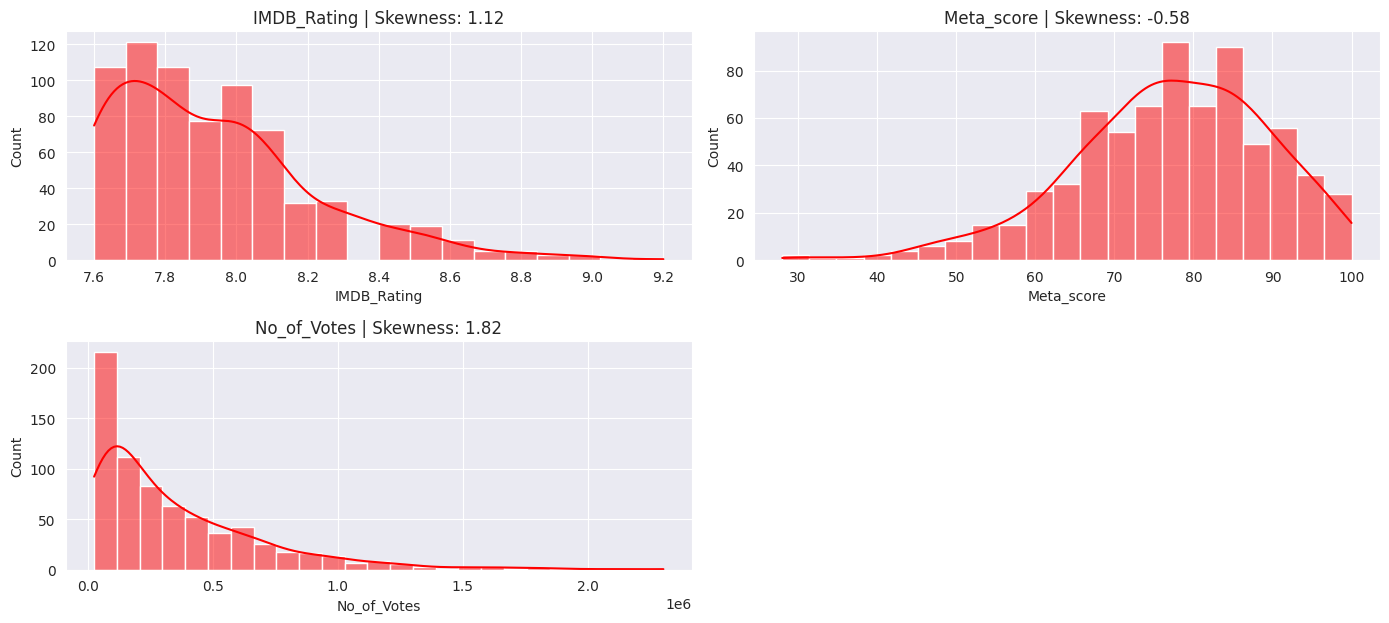

In [133]:
sns.set_style("darkgrid")


numericalColumns = df.select_dtypes(include=["int64", "float64"]).columns


plt.figure(figsize=(14, len(numericalColumns) * 3))
for idx, feature in enumerate(numericalColumns, 1):
    plt.subplot(len(numericalColumns), 2, idx)
    sns.histplot(df[feature], kde=True, color='red')
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")


plt.tight_layout()
plt.show()

### Conclusões análise univariada:

A análise para as colunas categóricas não foi muito boa devido ao grande número de gêneros, diretores e atores que tornaram os gráficos bastante ilegíveis. No entanto graças a eles foi possível notar a presença de uma linha preenchida incorretamente,  pois no ano de lançamento um dos valores apontados pelo gráfico é o "PG", algo que deveria estar na coluna "Certificate". Outra coisa interessante de se analisar é a variedade de gêneros, visto que podem haver combinações (drama, ação, mistério podem se referir a um mesmo filme).


## Análise Bivariada:

<Figure size 1000x600 with 0 Axes>

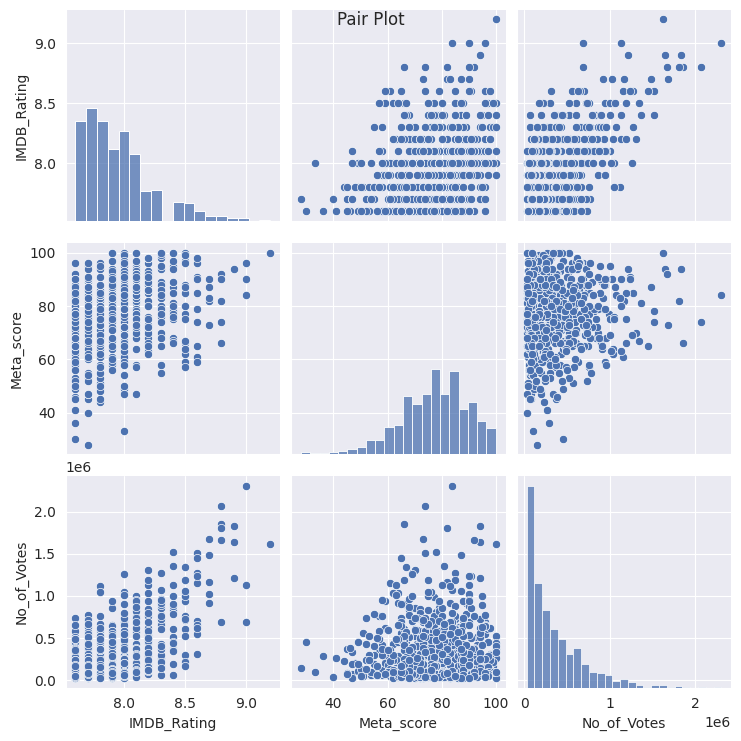

In [134]:
sns.set_palette("deep")

plt.figure(figsize=(10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot')
plt.show()

## Outros gráficos de interesse:



Achei interessante transformar a coluna do faturamento para uma coluna numérica de modo a obter gráficos que pudessem dar mais *insights*.


In [135]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)


## Faixa etária x Faturamento:

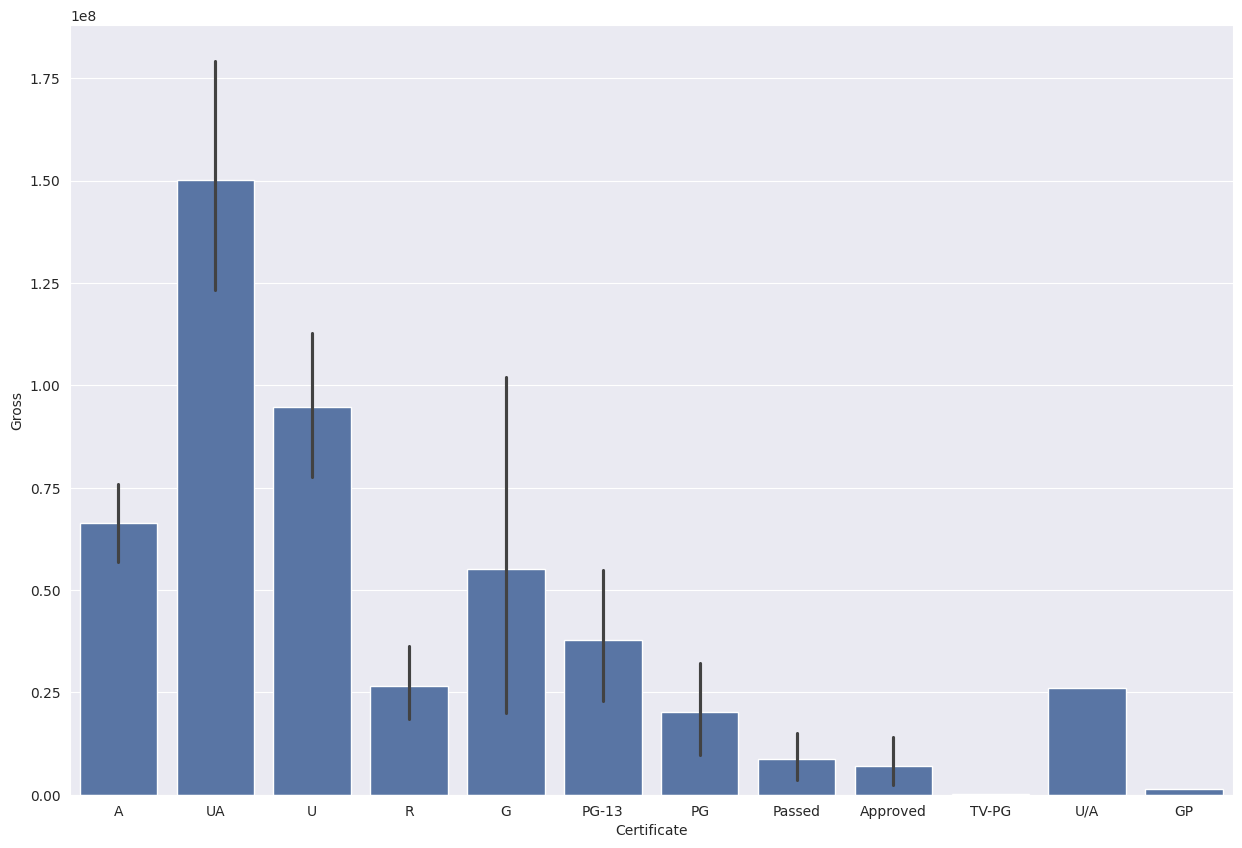

In [136]:
plt.figure(figsize=(15, 10))

sns.barplot(data=df, x='Certificate', y='Gross')

plt.xlabel('Certificate')
plt.ylabel('Gross')

plt.show()

## Correção da linha com valor incorreto no ano:
Aqui eu pensei em remover a linha por completo, mas optei por inserir o ano correto após uma breve pesquisa.

In [137]:
df.Released_Year[df.Released_Year == 'PG'] = '1995'

## Ano de lançamento x Nota IMDB:

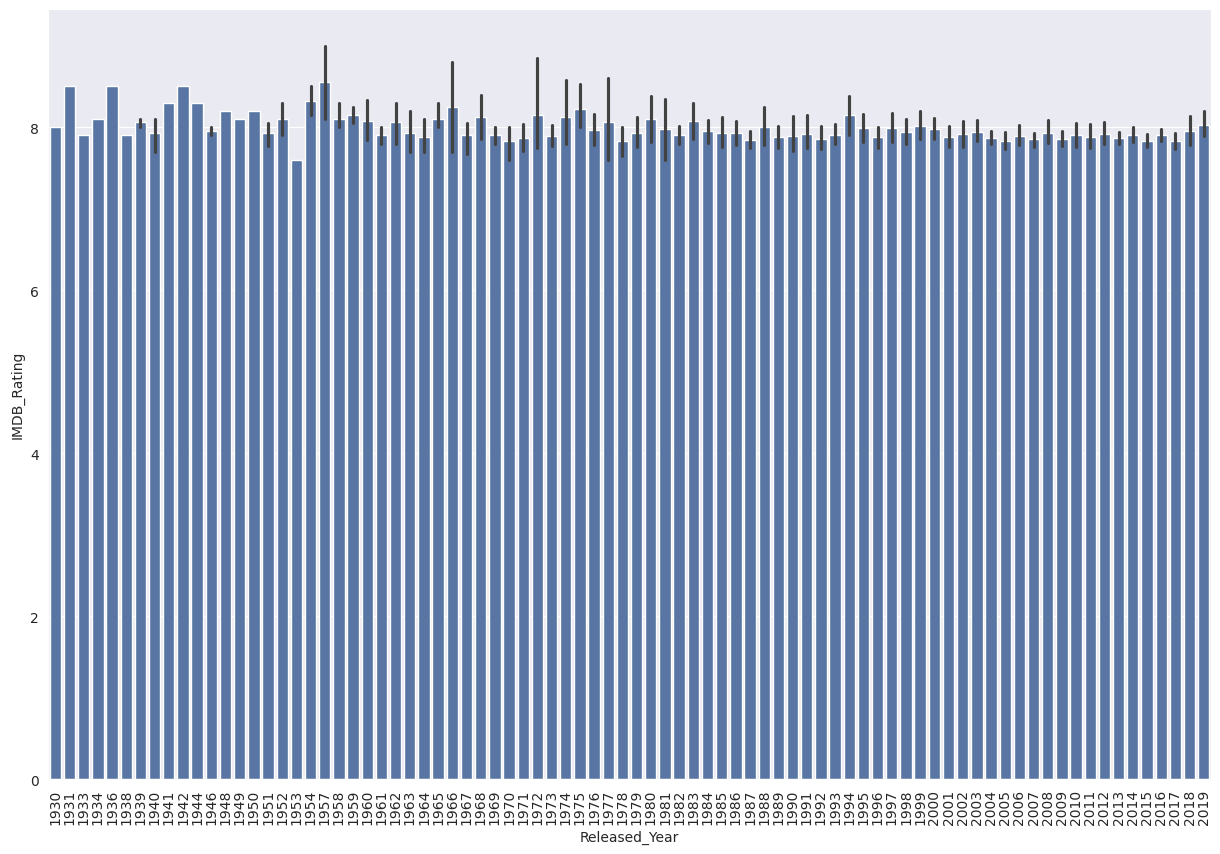

In [138]:
plt.figure(figsize=(15, 10))
yearDf = df.sort_values(by='Released_Year')

sns.barplot(data=yearDf, x='Released_Year', y='IMDB_Rating')

plt.xlabel('Released_Year')
plt.ylabel('IMDB_Rating')

plt.xticks(rotation=90)

plt.show()

## Diretor x Nota IMDB:

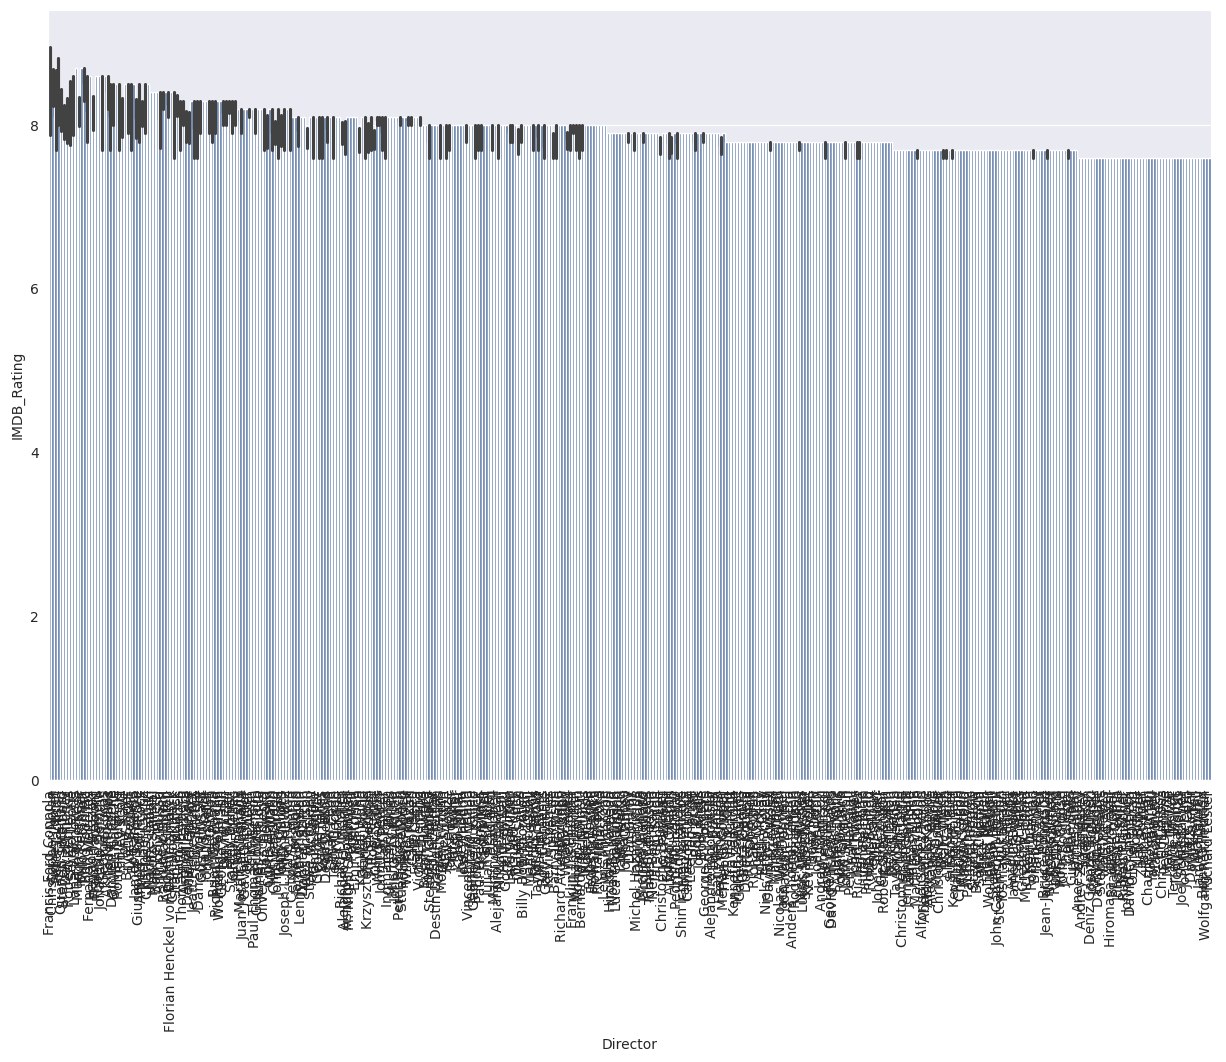

In [139]:
plt.figure(figsize=(15, 10))

sns.barplot(data=df, x='Director', y='IMDB_Rating')

plt.xlabel('Director')
plt.ylabel('IMDB_Rating')

plt.xticks(rotation=90)

plt.show()

## Conclusões:
Uma das coisas que mais me deu problemas foi que as colunas categóricas possuem muitos valores distintos de modo que os gráficos ficam ilegíveis quando os plotamos. Apesar de não ter implementado, penso que aqui poderia ser realizada uma redução do número de valores diferentes, talvez por meio de agrupamento (exemplo: gêneros poderiam ser reduzidos a apenas um principal ao invés de vários). Agora para os filmes, atores e diretores em si, achei mais complicado de resolver.

# 2)

- Qual filme você recomendaria para uma pessoa que você não conhece?
  **Resposta: Um filme de um dos gêneros com média de notas mais altas, e com um alto faturamento**

- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
  **Resposta: Nota da crítica, faixa etária do filme**

- Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
  **Resposta: Essa coluna me parece mais oferecer insights pra depois de decidir qual gênero assistir, mais como um critério de desempate. Esse dataset em particular torna as coisas um pouco mais complicadas pois é possível que um filme tenha mais de um gênero, mas se fosse apenas um único gênero seria possível descobrir qual é a partir da coluna Overview.**


# 3) Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?



Resposta: As alterações feitas no dataset foram explicadas durante o processo de EDA. O que precisa ser feito agora é verificar quais colunas vão realmente auxiliar na previsão da nota. No meu entendimento, as colunas Overview, Release_Year, Runtime, e possivelmente Star3 e Star4 podem ser removidas, pois não auxiliarão na previsão. O problema a ser resolvido é um de regressão visto que o que estamos tentando prever é o valor da nota do IMDB que é numérico, e não uma categoria. Para colunas categóricas como Director e Star1 vou transformá-las utilizando um encoding de frequência, pois quero analisar a influência de atores e diretores conhecidos na alteração da nota IMDB

## Encoding de Frequência:

In [140]:
frequencyEncoding = df['Director'].value_counts().to_dict()
df['Director_Encoded'] = df['Director'].map(frequencyEncoding)

frequencyEncoding = df['Star1'].value_counts().to_dict()
df['Star1_Encoded'] = df['Star1'].map(frequencyEncoding)

## Encoding por label:
 Aqui houve uma tentativa de transformar as colunas de faixa etária e gênero em colunas numéricas.

In [141]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Certificate_encoded'] = label_encoder.fit_transform(df['Certificate'])

label_encoder = LabelEncoder()
df['Genre_encoded'] = label_encoder.fit_transform(df['Genre'])


## Mapa de correlação:
Mas ao plotar o mapa de correlação foi observado que essas novas colunas não tem uma relação tão boa com a coluna de nota do IMDB, portanto ao treinar a máquina essas colunas não serão utilizadas. Devemos lembrar que o label encoder pode adicionar uma certa ordinalidade à colunas onde isso não havia antes, o que pode acarretar em erros da análise de correlação.


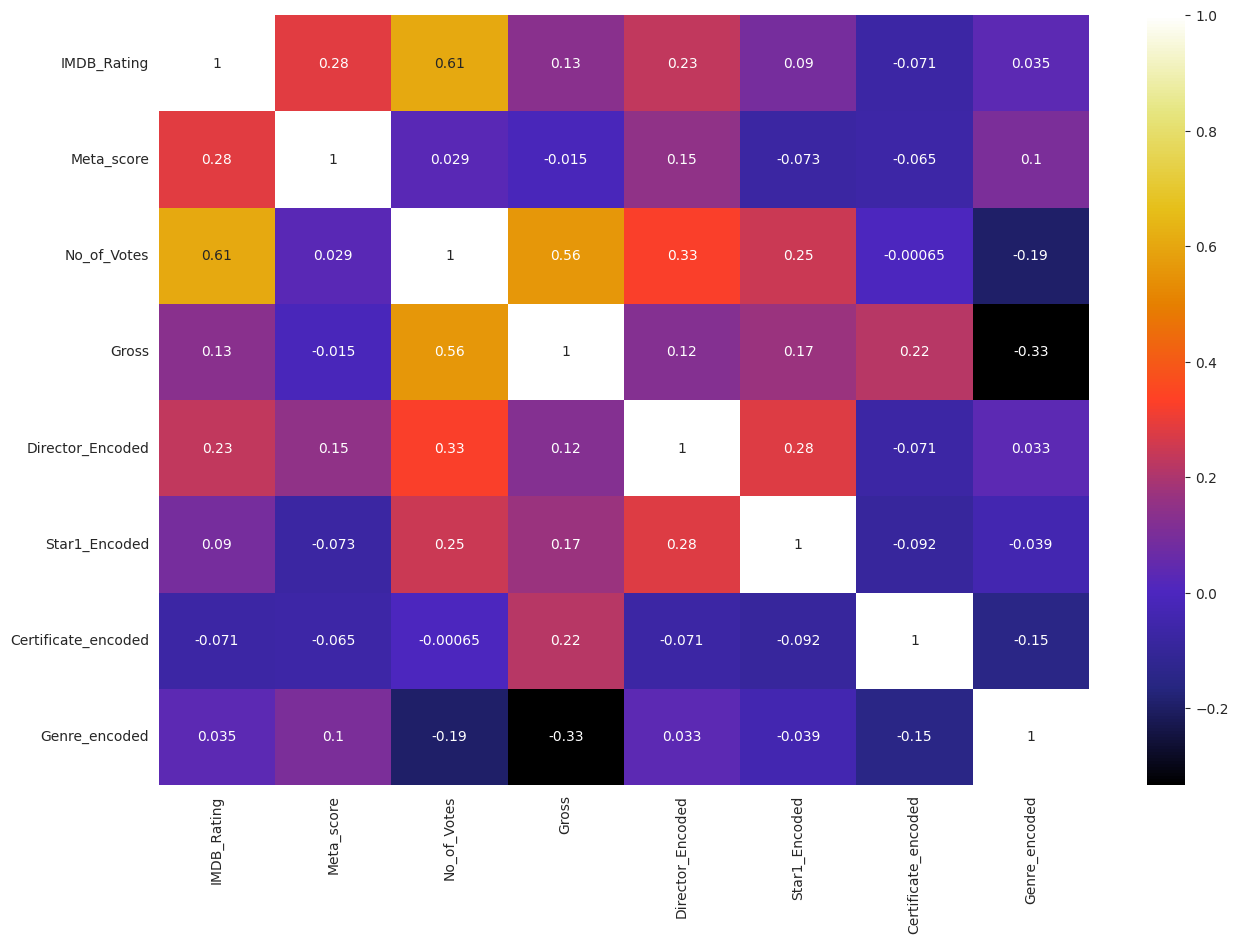

In [142]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(),cmap='CMRmap', annot=True)
plt.show()

## Modelo de Regressão Linear Multivariada:

In [143]:
#Importando Bibliotecas:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [144]:
model = LinearRegression()

In [145]:
y = df['IMDB_Rating']
X = df[['No_of_Votes','Gross' ,'Meta_score','Director_Encoded', 'Star1_Encoded']]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
X_train.shape

(499, 5)

In [148]:
X_test.shape

(214, 5)

In [149]:
model.fit(X_train, y_train)

LinearRegression()

### Análise de parâmetros do modelo:

In [150]:
print("R quadrado = {}".format(model.score(X_train,y_train)))
print('Intercept do Modelo :', model.intercept_)
print('Coeficientes do Modelo : ', model.coef_)

R quadrado = 0.5007712955304284
Intercept do Modelo : 7.318078454348875
Coeficientes do Modelo :  [ 6.64584016e-07 -8.07589879e-10  5.88899155e-03 -3.02883600e-03
 -1.35845121e-03]


In [151]:
lm = model.predict(X_test)

In [152]:
print("R quadrado de teste = {}".format(metrics.r2_score(y_test,lm).round(2)))

R quadrado de teste = 0.51


Podemos ver a partir destes parâmetros que o modelo ficou bastante aquém do esperado. Isso pode ter acontecido por conta das colunas que eu selecionei como sendo importantes para a decisão da nota, ou pelo próprio encoding que pode ter afetado de alguma maneira inesperada, ou pelo número reduzido de linhas visto que as que possuíam valores nulos foram removidas.

In [153]:
y_predict_train = model.predict(X_train)

<Axes: title={'center': 'Nota IMDB dos filmes Previsão X Real'}, xlabel='Nota IMDB - Previsto', ylabel='Nota IMDB - Real'>

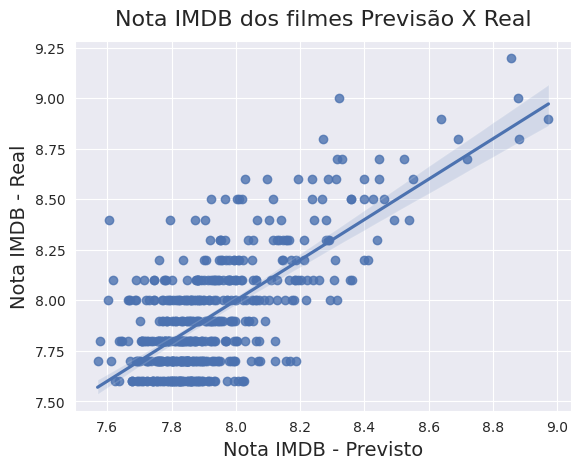

In [154]:
ax = sns.regplot(x = y_predict_train,y=y_train)
ax.set_title('Nota IMDB dos filmes Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Nota IMDB - Previsto", fontsize=14)
ax.set_ylabel("Nota IMDB - Real", fontsize=14)
ax

## Salvando o modelo no formato pkl:

In [155]:
import pickle

with open("LH_CD_GUILHERMEMARTINS.pkl", "wb") as f:
    pickle.dump(model, f)

######################################################################


# Carregando o modelo e utilizando para prever a nota de um filme:

In [156]:
with open("LH_CD_GUILHERMEMARTINS.pkl", "rb") as f:
    unpickledModel = pickle.load(f)

Verificando que é o mesmo modelo, e não houve alterações nos parâmetros:

In [157]:
print('R quadrado = {}'.format(unpickledModel.score(X_train,y_train)))
print('Intercept do Modelo :', unpickledModel.intercept_)
print('Coeficientes do Modelo : ', unpickledModel.coef_)

R quadrado = 0.5007712955304284
Intercept do Modelo : 7.318078454348875
Coeficientes do Modelo :  [ 6.64584016e-07 -8.07589879e-10  5.88899155e-03 -3.02883600e-03
 -1.35845121e-03]


Primeiro precisamos garantir que o input tenha o mesmo formato do dataframe usado no treino. Ou seja, 5 colunas, onde o valor de orçamento é transformado para float, e as colunas de star1 e director passaram por um encoding de frequência.
  Criei um arquivo chamado predict.csv onde será colocado o filme que desejamos analisar a nota. A partir dele faremos os processos de preparação.

In [158]:
dfO = pd.read_csv('desafio_indicium_imdb.csv')
dfPredict = pd.read_csv('predict.csv', index_col=False)
dfPredict = dfPredict.drop('Unnamed: 0', axis=1)
dfPredict['Gross'] = dfPredict['Gross'].str.replace(',', '').astype(float)
dfPredict.head()


,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0


In [159]:
# Conta quantos filmes feitos pelo mesmo diretor tem no dataset inicial, de forma a criar a nova frequência
counts = dfO.Director[dfO.Director == 'Frank Darabont'].value_counts()
if counts.empty:
    dfPredict['Director_Encoded'] = 1
else:
  dfPredict['Director_Encoded'] = dfPredict['Director'].map(counts+1)
dfPredict

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Director_Encoded
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,2


In [160]:
#Mesma coisa para a coluna Star1
counts = dfO.Star1[dfO.Star1 == 'Tim Robbins'].value_counts()
if counts.empty:
    dfPredict['Star1_Encoded'] = 1
else:
  dfPredict['Star1_Encoded'] = dfPredict['Star1'].map(counts+1)

dfPredict = dfPredict.drop(columns=['Series_Title', 'Released_Year', 'Runtime', 'Star2', 'Star3', 'Star4', 'Overview', 'Star1','Director','Genre','Certificate'])
dfPredict = dfPredict[['No_of_Votes','Gross' ,'Meta_score','Director_Encoded', 'Star1_Encoded']]
dfPredict

,No_of_Votes,Gross,Meta_score,Director_Encoded,Star1_Encoded
0,2343110,28341469.0,80.0,2,1


In [161]:
predictionResult = unpickledModel.predict(dfPredict)
print("A nota do filme é {}".format(predictionResult))

A nota do filme é [9.31608682]


# Pensamentos Finais:

Algumas coisas mais para o final poderiam ser melhoradas, mas devido ao limite de tempo acabou ficando desta forma. A formatação do arquivo predict.csv pode ser melhor automatizada de modo a lidar com múltiplas entradas no arquivo. Pela mesma questão de tempo não foi possível testar novas combinações de colunas que teriam um maior efeito na predição da nota do filme.